# Homework 2: Randomized Block and Latin Square Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 20, 2026**

**PART 1 INSTRUCTIONS:** You are an educational researcher interested in comparing different methods for teaching data science to undergraduate students. There are three different methods you are interested in comparing: (1) Direct Instruction (traditional method); (2) Inquiry-Based Learning (teacher facilitates student problem solving); (3) Collaborative Learning (students working in small groups). To compare these methods, you decide to randomly recruit undergraduate data science students to be part of a workshop on hypothesis testing basics. Students will be randomly assigned to one of three workshops, where each workshop employs a different teaching method. At the end of the workshop, students will be given a 50-question quiz where their understanding of hypothesis testing will be assessed. Percentage scores on this quiz serve as the outcome of interest.

However, it would be apparent that the prior level of knowledge a student possess about hypothesis testing may serve as a potential confounding variable that you would want to control for. Thus, the Prior Knowledge a given student has about hypothesis testing is categorized into "High" and "Low". The data from this experiment are contained in the `Data Science Teaching Method.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The goal of this study is to find out whether the way hypothesis testing is taught affects how well students perform on a quiz. Specifically, we want to compare three teaching approaches — Direct Instruction, Inquiry-Based Learning, and Collaborative Learning — to see if one method leads to better quiz scores than the others. At the same time, we want to account for students’ prior knowledge (High or Low), since students who already know more about hypothesis testing might naturally score higher regardless of the teaching method.

**Question 2.** Specify the outcome variable

The outcome variable in this experiment is the students’ performance on the hypothesis testing quiz. It is measured as the percentage score obtained on the 50-question quiz at the end of the workshop.

**Question 3.** Specify the independent variable and blocking factor. What are some possible lurking variables?

The independent variable (treatment factor) in this study is the teaching method. It has three levels: Direct Instruction, Inquiry-Based Learning, and Collaborative Learning. This is the main factor we are testing to see if it affects quiz performance.

The blocking factor is Prior Knowledge, which is categorized as High or Low. We use this as a blocking variable because students who already understand hypothesis testing may perform better on the quiz, regardless of the teaching method.

Some possible lurking variables could include students’ general academic ability, study habits, level of participation during the workshop, interest in the subject, or even differences in how the instructor delivered each session. These factors might influence quiz scores but are not directly controlled in the experiment.

**Question 4.** Briefly explain why a randomized block design would be appropriate here. Similarly, explain why a completely randomized design would not be appropriate.

A randomized block design is appropriate in this experiment because prior knowledge can strongly influence quiz scores. If students already have a strong background in hypothesis testing, they are more likely to score higher no matter which teaching method they receive. By blocking students into High and Low prior knowledge groups, we reduce the effect of this variability and make a fairer comparison between the teaching methods.

A completely randomized design would not be ideal here because it would ignore prior knowledge. If more high-knowledge students were randomly placed into one teaching method, that method might appear better simply because of the students’ background, not because the method itself is more effective. Blocking helps control for this and makes the results more reliable.

**Question 5.** State the null and alternative hypotheses for this experiment.

The null hypothesis (H₀) is that the mean quiz scores are the same for all three teaching methods after accounting for prior knowledge. In other words, the teaching method does not affect students’ average performance.

The alternative hypothesis (Hₐ) is that at least one teaching method has a different mean quiz score compared to the others, after controlling for prior knowledge.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

To explore the data, I first examined summary statistics for quiz scores across the three teaching methods. The Collaborative Learning group had the highest average score, followed by Inquiry-Based Learning, and then Direct Instruction. The differences in means suggest that teaching method may influence student performance.

Looking at the standard deviations, the spread of scores appears somewhat similar across groups, although there is some variation. The boxplot for teaching method also shows that the Collaborative group generally has higher scores compared to the other two methods.

When examining Prior Knowledge, students classified as High prior knowledge have noticeably higher average scores than those in the Low group. The boxplot confirms this pattern, showing that the High group tends to score consistently higher overall.

Based on these exploratory results, the alternative hypothesis appears more plausible. The mean differences between teaching methods and the clear separation between prior knowledge groups suggest that both factors may influence quiz performance.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Prior_Knowledge  60 non-null     object 
 1   Teaching_Method  60 non-null     object 
 2   Score            60 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.5+ KB


/tmp/ipython-input-107430278.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Teaching_Method", y="Score", data=df, palette="Set2")


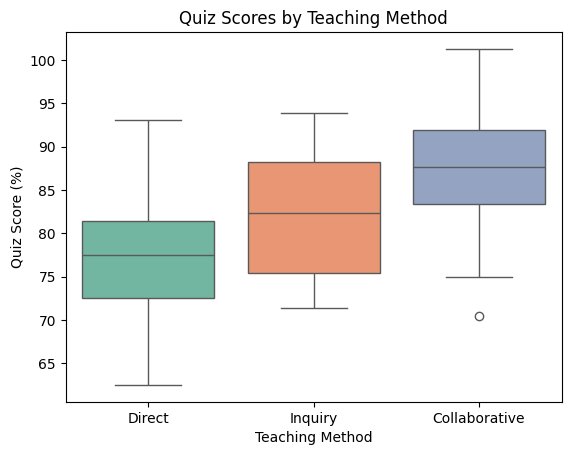

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel("Data Science Teaching Method.xlsx")

# Basic info
df.info()

# Summary statistics by Teaching Method
method_summary = df.groupby("Teaching_Method")["Score"].describe()
method_summary

# Summary statistics by Prior Knowledge
knowledge_summary = df.groupby("Prior_Knowledge")["Score"].describe()
knowledge_summary

# Boxplot for Teaching Method
sns.boxplot(x="Teaching_Method", y="Score", data=df, palette="Set2")
plt.title("Quiz Scores by Teaching Method")
plt.ylabel("Quiz Score (%)")
plt.xlabel("Teaching Method")
plt.show()

/tmp/ipython-input-3032175289.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Prior_Knowledge", y="Score", data=df, palette="Pastel1")


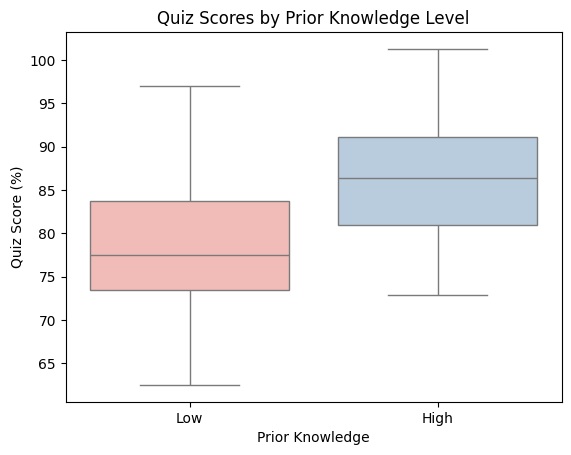

In [3]:
# Boxplot for Prior Knowledge
sns.boxplot(x="Prior_Knowledge", y="Score", data=df, palette="Pastel1")
plt.title("Quiz Scores by Prior Knowledge Level")
plt.ylabel("Quiz Score (%)")
plt.xlabel("Prior Knowledge")
plt.show()

**Question 7.** Build a two-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

A two-way ANOVA model was fitted with Score as the response variable, Teaching_Method as the main factor, and Prior_Knowledge as the blocking factor.

From the ANOVA table, both Teaching_Method and Prior_Knowledge have statistically significant effects on quiz scores (p-values less than 0.05). This indicates that teaching method influences performance, and prior knowledge also plays an important role in determining student scores.

To evaluate the normality assumption, I first examined the Q-Q plot of the residuals. The points generally follow the reference line, with only small deviations at the tails. There is no strong curvature or systematic pattern, which suggests that the residuals are approximately normally distributed.

I also conducted the Shapiro–Wilk test. The test produced a p-value much greater than 0.05 (around 0.88). Since the p-value is not statistically significant, we fail to reject the null hypothesis of normality.

Based on both the Q-Q plot and the Shapiro–Wilk test, the normality assumption appears to be satisfied for this two-way ANOVA model.

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit two-way ANOVA model (additive model)
anova_model = ols("Score ~ C(Teaching_Method) + C(Prior_Knowledge)", data=df).fit()

anova_results = sm.stats.anova_lm(anova_model, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
C(Teaching_Method),923.670743,2.0,11.632036,0.000060
C(Prior_Knowledge),764.836807,1.0,19.263595,0.000051
Residual,2223.409543,56.0,NaN,NaN


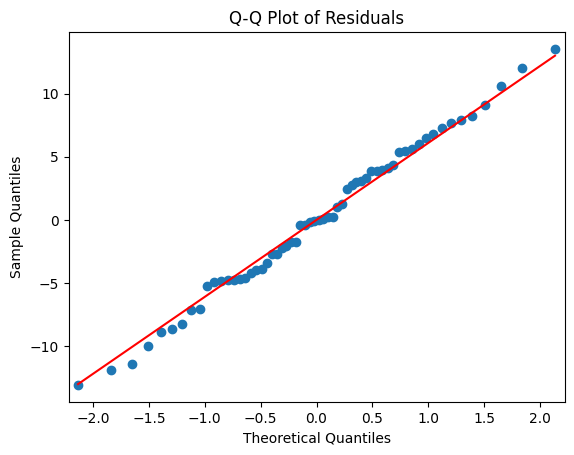

In [8]:
resid = anova_model.resid

sm.qqplot(resid, line="s")
plt.title("Q-Q Plot of Residuals")
plt.show()

In [10]:
shapiro_stat, shapiro_p = stats.shapiro(resid)
shapiro_stat, shapiro_p

(np.float64(0.9893192280271398), np.float64(0.8794000184343089))

*Question 8.* Test the assumption of homogeneity of variance using *both* a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

To examine the homogeneity of variance assumption, I first looked at the Residuals vs Predicted Values plot. The residuals appear to be scattered around zero without forming a clear funnel or widening pattern. Although there is some variation in spread, there is no strong visual evidence that the variance changes systematically across predicted values.

Next, I performed the Breusch–Pagan test to formally test for heteroscedasticity. The p-value from this test is greater than 0.05, meaning we fail to reject the null hypothesis of constant variance.

Based on both the visual inspection and the Breusch–Pagan test, the homogeneity of variance assumption appears to be reasonably satisfied for this two-way ANOVA model.

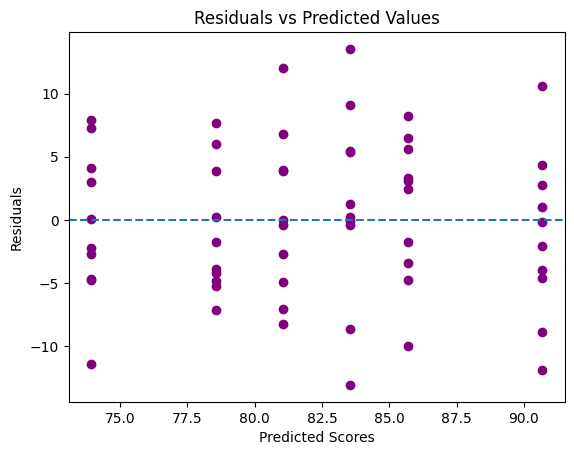

In [7]:
# Residuals vs Fitted plot
fitted_vals = anova_model.fittedvalues
residual_vals = anova_model.resid

plt.scatter(fitted_vals, residual_vals, color="purple")
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Scores")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

In [11]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residual_vals, anova_model.model.exog)
bp_statistic = bp_test[0]
bp_pvalue = bp_test[1]

bp_statistic, bp_pvalue

(np.float64(2.341194371999711), np.float64(0.5046751257948525))

*Question 9.* Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

From the two-way ANOVA table, the F-statistic for the treatment factor (Teaching_Method) is approximately 11.63, with a p-value around 0.00006.

Since the p-value is far below 0.05, we reject the null hypothesis. This provides strong statistical evidence that the average quiz scores are not the same across all three teaching methods, after accounting for prior knowledge.

Therefore, the alternative hypothesis is more strongly supported. This suggests that the teaching approach has a meaningful impact on student performance.

*Question 10.* If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

Since the overall ANOVA test showed a statistically significant effect of Teaching_Method, I conducted Tukey’s HSD post-hoc test to determine which specific teaching methods differ from each other.

The Tukey results indicate that Collaborative Learning and Direct Instruction are significantly different, with Collaborative Learning producing higher average scores. However, the differences between Collaborative Learning and Inquiry-Based Learning, as well as between Direct Instruction and Inquiry-Based Learning, are not statistically significant.

This means that the strongest evidence of a difference is between Collaborative Learning and Direct Instruction, while Inquiry-Based Learning does not differ significantly from the other two methods at the 0.05 significance level.


In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(endog=df["Score"],
                                  groups=df["Teaching_Method"],
                                  alpha=0.05)

print(tukey_results)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
    group1     group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
Collaborative  Direct  -9.6085 0.0003 -15.1184 -4.0986   True
Collaborative Inquiry  -4.9855 0.0838 -10.4954  0.5244  False
       Direct Inquiry    4.623 0.1168  -0.8869 10.1329  False
-------------------------------------------------------------


*Question 11.* Write a brief, contextual conclusion summarizing the results of your analyses, including potential limitations and future directions of this experiment.

In this study, we compared three different teaching methods to determine whether they lead to different quiz scores on hypothesis testing. A randomized block design was used to control for students’ prior knowledge (High or Low), since that factor could influence performance.

The two-way ANOVA results showed that Teaching_Method has a statistically significant effect on quiz scores. This means that not all teaching approaches produce the same average results. Prior Knowledge was also significant, confirming that students who already had stronger background knowledge tended to score higher overall.

The Tukey post-hoc test further showed that Collaborative Learning differs significantly from Direct Instruction, with Collaborative Learning resulting in higher average scores. However, Inquiry-Based Learning was not significantly different from the other two methods at the 0.05 level.

The model assumptions were checked and appeared reasonably satisfied. The residuals were approximately normal based on the Q-Q plot and Shapiro–Wilk test, and there was no strong evidence of unequal variance based on the residual plot and Breusch–Pagan test.

One limitation of this experiment is that it only examined short-term quiz performance from a single workshop. The results may not fully reflect long-term understanding or retention of material. Additionally, other factors such as instructor delivery style, student motivation, or classroom interaction could also influence outcomes. In future research, larger sample sizes or repeated studies across different courses could provide stronger evidence about which teaching method is most effective.

**PART 2 INSTRUCTIONS**: Now suppose a university is evaluating the effectiveness of four different online learning platforms (say A, B, C, and D) on student engagement for students taking an undergraduate data science course in an online synchronous format. One section of the course is offered Monday through Thursday in the Morning, Early Afternoon, Mid-Afternoon, and Evening sections. Student engagement is measured through the total number of logins to the online learning platform for a given course section over the course of the
semester. Below is a table describing the study design and factors:


| Section \ Day     | Monday | Tuesday | Wednesday | Thursday |
|-------------------|--------|---------|-----------|----------|
| **Morning**       | A      | B       | C         | D        |
| **Early Afternoon** | B      | C       | D         | A        |
| **Mid-Afternoon** | C      | D       | A         | B        |
| **Evening**       | D      | A       | B         | C        |


Here, our main interest is in comparing engagement across the online learning platforms, but we also want to control for Day of the Week as well as Time of Day, as these could potentially be confounding variables. The data for this experiment are contained in the `Online Learning and Engagement.xlsx` file. With these data, your tasks are:

**Question 1.** Briefly define the objective of this experiment

The main objective of this experiment is to check whether the online learning platform being used (A, B, C, or D) changes student engagement, measured by the total number of logins during the semester. At the same time, we want to make the platform comparison fair by controlling for the Day of the Week and the course section time (Morning, Early Afternoon, Mid Afternoon, Evening), since those could also affect how active students are.

**Question 2.** Specify the outcome variable

The outcome variable in this experiment is student engagement. It is measured as the total number of times students logged into the online learning platform for each course section over the semester.

**Question 3.** Specify the independent variable and blocking factors. What are some other possible lurking variables?

The independent variable (treatment factor) in this study is the online learning platform, which has four levels: A, B, C, and D. This is the main factor we are interested in comparing to see if it affects student engagement.

The blocking factors are Day of the Week (Monday through Thursday) and Section or Time of Day (Morning, Early Afternoon, Mid Afternoon, and Evening). These are treated as blocking variables because engagement may naturally vary depending on the day or time the class meets, even if the platform stays the same.

Some possible lurking variables could include differences in instructor teaching style, variation in course content difficulty during the week, student workload from other classes, internet connectivity issues, or differences in student motivation across sections. These factors might influence engagement but are not directly controlled in this design.

**Question 4.** Briefly explain why a Latin Square Design would be appropriate here. Similarly, explain why a completely randomized design or randomized block design would not be appropriate.

A Latin Square Design is appropriate in this situation because we have two potential nuisance factors: Day of the Week and Time of Day (Section). Both of these could influence student engagement, and we want to control for them while comparing the four platforms. In a Latin Square Design, each platform appears exactly once in each day and once in each section. This allows us to separate the platform effect from the effects of day and time.

A completely randomized design would not be suitable because it would ignore both day and time, which could introduce unnecessary variation into the results. A randomized block design would also not be enough here, since it can typically control for only one blocking factor at a time. In this experiment, we need to control for two blocking variables simultaneously, which is why a Latin Square Design is more appropriate.

**Question 5.** State the null and alternative hypotheses for this experiment.

The null hypothesis (H₀) states that the average student engagement is the same for all four online learning platforms (A, B, C, and D), after accounting for the effects of Day of the Week and Section.

The alternative hypothesis (Hₐ) states that at least one platform has a different average level of student engagement compared to the others, after controlling for Day and Section.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

To begin the analysis, I examined summary statistics for engagement across the four platforms. Platform A has the highest average number of logins, while Platforms B and C have noticeably lower averages. Platform D falls in between but is closer to Platform A than to B or C.

The standard deviations show that some platforms (especially B and C) have slightly larger variation compared to A and D. This suggests that engagement is somewhat more consistent for certain platforms.

When looking at the boxplots, Platform A generally appears higher than B and C. Platform D overlaps with the others but does not appear dramatically different. The boxplots for Day and Section do not show very large differences across categories, suggesting that day of the week and time of day may not have a strong visible effect.

Overall, based on these exploratory results, the alternative hypothesis seems more reasonable. The noticeable difference in average engagement, particularly between Platform A and some of the other platforms, suggests that platform choice may influence student engagement.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Day         16 non-null     object 
 1   Section     16 non-null     object 
 2   Platform    16 non-null     object 
 3   Engagement  16 non-null     float64
dtypes: float64(1), object(3)
memory usage: 644.0+ bytes


/tmp/ipython-input-49866814.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Platform", y="Engagement", data=engagement_df, palette="coolwarm")


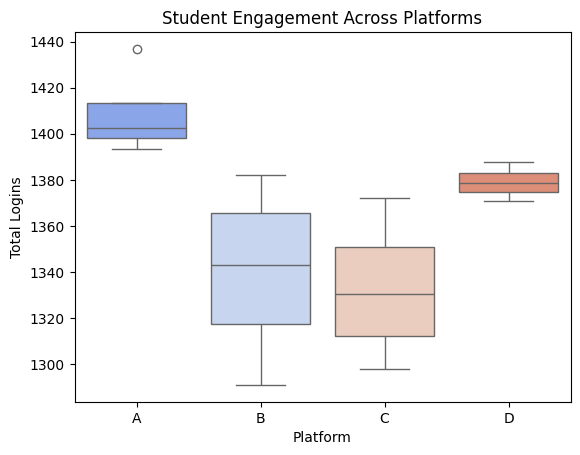

/tmp/ipython-input-49866814.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Day", y="Engagement", data=engagement_df, palette="Set3")


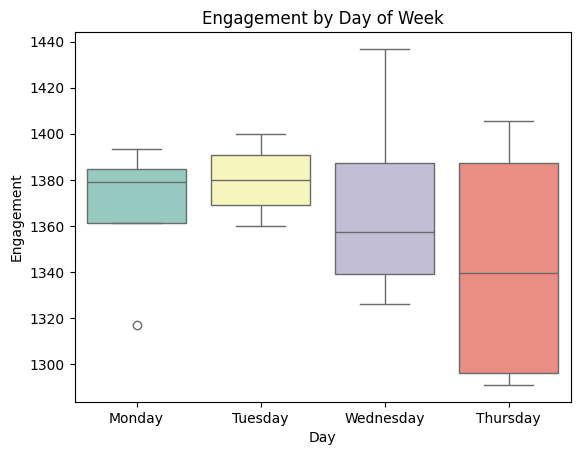

/tmp/ipython-input-49866814.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Section", y="Engagement", data=engagement_df, palette="Pastel2")


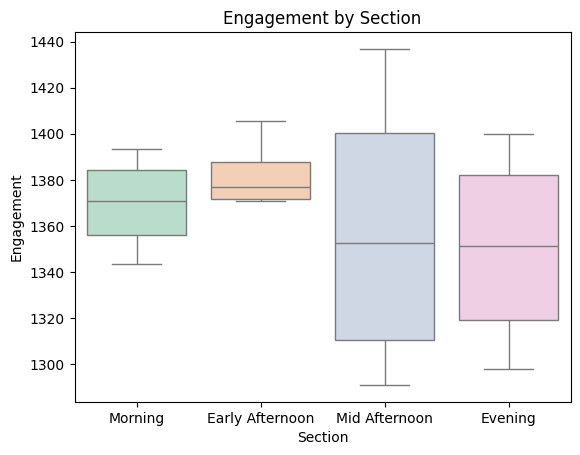

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
engagement_df = pd.read_excel("Online Learning and Engagement.xlsx")

# View structure
engagement_df.info()

# Summary statistics by Platform
platform_stats = engagement_df.groupby("Platform")["Engagement"].agg(["mean","std","min","max"])
platform_stats

# Summary by Day
day_stats = engagement_df.groupby("Day")["Engagement"].mean()
day_stats

# Summary by Section
section_stats = engagement_df.groupby("Section")["Engagement"].mean()
section_stats

# Boxplot for Platform comparison
sns.boxplot(x="Platform", y="Engagement", data=engagement_df, palette="coolwarm")
plt.title("Student Engagement Across Platforms")
plt.ylabel("Total Logins")
plt.show()

# Boxplot for Day
sns.boxplot(x="Day", y="Engagement", data=engagement_df, palette="Set3")
plt.title("Engagement by Day of Week")
plt.show()

# Boxplot for Section
sns.boxplot(x="Section", y="Engagement", data=engagement_df, palette="Pastel2")
plt.title("Engagement by Section")
plt.show()

**Question 7.** Build a three-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

A three-way ANOVA model (Latin Square additive model) was fitted with Engagement as the response variable and Platform, Day, and Section as factors.

From the ANOVA table, Platform shows a statistically significant effect on engagement (p-value < 0.05). However, Day and Section do not appear to have statistically significant effects in this dataset.

To check the normality assumption, I examined the Q-Q plot of the residuals. The points generally follow a straight line, although there are slight deviations at the extreme ends. Given the small sample size (16 observations), minor tail deviations are expected and do not indicate a serious problem.

I also conducted the Shapiro–Wilk test for normality. The p-value is much greater than 0.05 (around 0.88), meaning we fail to reject the null hypothesis of normality.

Based on both the visual inspection and the Shapiro test, the residuals appear approximately normally distributed, so the normality assumption for ANOVA seems reasonable.

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit Latin Square additive model
latin_model = ols("Engagement ~ C(Platform) + C(Day) + C(Section)",
                  data=engagement_df).fit()

anova_latin = sm.stats.anova_lm(latin_model, typ=2)
anova_latin

,sum_sq,df,F,PR(>F)
C(Platform),15221.225819,3.0,7.607701,0.018122
C(Day),2774.676069,3.0,1.386807,0.334557
C(Section),2396.427869,3.0,1.197756,0.387569
Residual,4001.530887,6.0,NaN,NaN


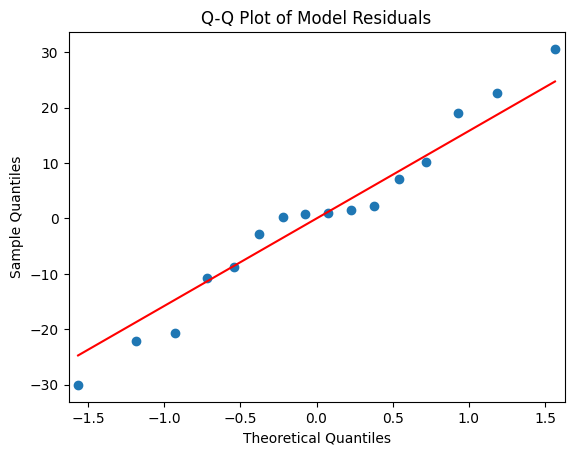

In [16]:
residual_values = latin_model.resid

sm.qqplot(residual_values, line="s")
plt.title("Q-Q Plot of Model Residuals")
plt.show()

In [17]:
statistic, p_val = shapiro(residual_values)
statistic, p_val

(np.float64(0.9726642150775048), np.float64(0.8796977463074305))

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

To evaluate the homogeneity of variance assumption, I first looked at the Residuals vs Fitted plot. The residuals appear scattered above and below zero without forming a clear funnel pattern. Although there is some variation in spread at certain fitted values, there is no strong visual evidence that the variance systematically increases or decreases.

Next, I performed the Breusch–Pagan test. The p-value from this test is greater than 0.05, so we fail to reject the null hypothesis of constant variance.

Even though the residual plot shows some uneven spread (which is common with a small sample size), the formal test does not indicate significant heteroscedasticity. Therefore, the homogeneity of variance assumption appears to be reasonably satisfied for this model.

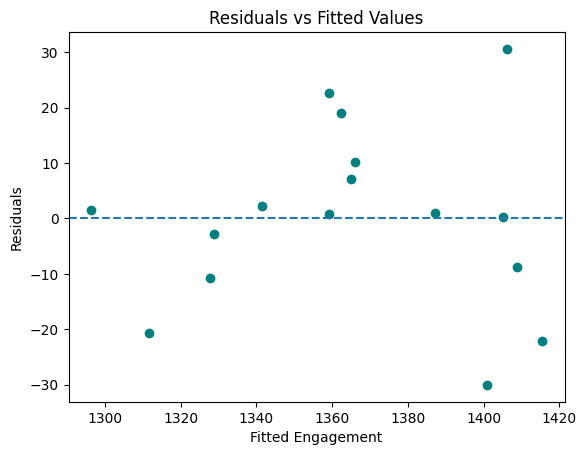

In [18]:
# Residuals vs fitted values
predicted_vals = latin_model.fittedvalues
resid_vals = latin_model.resid

plt.scatter(predicted_vals, resid_vals, color="teal")
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted Engagement")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

In [19]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_output = het_breuschpagan(resid_vals, latin_model.model.exog)
bp_stat = bp_output[0]
bp_p = bp_output[1]

bp_stat, bp_p

(np.float64(9.785054760185359), np.float64(0.3681649961425182))

**Question 9.** Report the F-statistic and its associated p-value for the treatment effect. Which of our two hypotheses is more strongly supported? Why?

From the Latin Square ANOVA table, the F-statistic for the treatment factor (Platform) is approximately 7.61, with a p-value of about 0.018.

Because the p-value is less than 0.05, we reject the null hypothesis. This indicates that there is statistically significant evidence that at least one of the online learning platforms has a different average level of student engagement, after controlling for Day of the Week and Section.

Therefore, the alternative hypothesis is more strongly supported, suggesting that platform choice does have an impact on engagement.

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which levels of the treatment effect are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

Since the overall ANOVA test indicated a significant platform effect, I conducted Tukey’s HSD test to identify which specific platforms differ in engagement.

The Tukey results show that Platform A differs significantly from Platform B and Platform C. The p-values for these comparisons are below 0.05, indicating statistically significant differences in average engagement.

However, Platform A does not differ significantly from Platform D, and there are no statistically significant differences between Platforms B, C, and D.

This suggests that the main engagement differences involve Platform A compared to B and C, while the remaining platforms have similar average engagement levels.

In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_platform = pairwise_tukeyhsd(endog=engagement_df["Engagement"],
                                   groups=engagement_df["Platform"],
                                   alpha=0.05)

print(tukey_platform)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     A      B -69.1275 0.0186 -127.1688 -11.0862   True
     A      C  -76.205 0.0099 -134.2463 -18.1637   True
     A      D  -29.825 0.4534  -87.8663  28.2163  False
     B      C  -7.0775  0.983  -65.1188  50.9638  False
     B      D  39.3025 0.2375  -18.7388  97.3438  False
     C      D    46.38 0.1359  -11.6613 104.4213  False
-------------------------------------------------------


**Question 11.** Write a brief conclusion summarizing the results of your analyses, including potential limitations and future directions of this experiment.

In this experiment, a Latin Square Design was used to compare four online learning platforms (A, B, C, and D) while controlling for both Day of the Week and Time of Day. The goal was to determine whether the platform itself influences student engagement, measured by total logins.

The ANOVA results showed that Platform has a statistically significant effect on engagement (p < 0.05). This means that engagement levels are not the same across all four platforms after accounting for day and section. However, Day and Section were not statistically significant in this dataset, suggesting that their impact on engagement was not strong here.

The Tukey post-hoc analysis revealed that Platform A differs significantly from Platforms B and C, while the other comparisons were not statistically significant. This indicates that Platform A appears to stand out in terms of engagement compared to some of the others.

The model assumptions were also checked and appeared reasonably satisfied. The Q-Q plot and Shapiro–Wilk test supported normality of residuals, and the Breusch–Pagan test did not provide strong evidence of unequal variance.

One limitation of this study is the small sample size, since the Latin Square design only included 16 observations. With such a limited number of data points, the results may be sensitive to small fluctuations. Future studies could repeat the experiment across multiple semesters or include more sections to strengthen the conclusions. It may also be helpful to explore additional factors such as instructor differences or course workload, which could further influence student engagement.